# 다항회귀(Polynomial Regression)
---

일반적인 단순 선형 회귀는 y = w0 + w1 * x1 + w2 * x2 + , ... + wn * xn 과 같이 독립변수(feature)와 종속변수(target)의 관계가 1차 방정식의 형태로 표현된 회귀입니다. 



데이터셋이 선형적이라면 단순 선형회귀 역시 높은 성능을 보일 수 있겠지만 데이터셋이 비선형인 경우 다항회귀를 사용하는 것이 더 높은 성능을 기대할 수 있습니다. 

예시를 위해 다음의 코드를 이용해 비선형 데이터를 생성합니다.

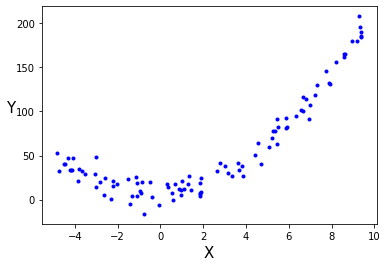

In [65]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
X = -5 + 15 * np.random.rand(n,1)
noise = 10 * np.random.randn(n, 1)

y = 2*X**2 + 1*X + 10 + noise # 2차 방정식에 noise를 포함 (ax^2 + bx + c + noise)

plt.plot(X,y,"b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

위와 같은 비선형 데이터가 존재할 때 단순히 직선으로 예측하는 경우 아래와 같이 높은 성능을 보장하기 어려운 경우가 발생한다.

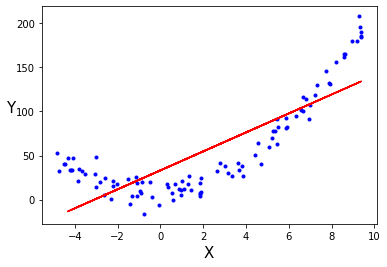

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.plot(X,y,"b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.plot(X_test, pred, 'r')
plt.show()

이러한 문제를 해결하기 위해 **Polynomial Regression**을 이용할 수 있는데 sklearn에서는 선형회귀를 이용해 비선형 함수를 선형 보델에 적용하는 방법으로 구현이 가능합니다.

sklearn에서 제공하는 **PolynomialFeatures 클래스는 dgree 파라미터를 이용해 degree에 해당하는 다항식 피쳐로 변환**해줍니다.

In [58]:
# PolynomialFeatures 클래스를 이용해 피처를 다항식 피처로 변환
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 인 2차 다항식으로 X를 변환
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print('일차 단항식 계수 피처 : ',X[0])
print('변환된 2차 다항식 계수 피처 : ',X_poly[0])

일차 단항식 계수 피처 :  [-4.46110969]
변환된 2차 다항식 계수 피처 :  [-4.46110969 19.9014997 ]


이어서 LinearRegression 모델에 확장된 Train set을 학습시키고 예측 결과를 시각적으로 확인해보겠습니다.

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([9.52573385]), array([[1.25484433, 2.05247243]]))

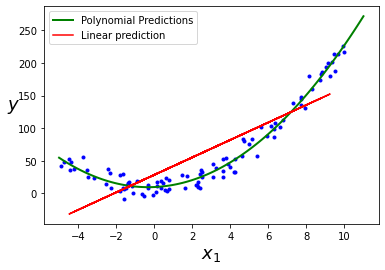

In [60]:
X_new=np.linspace(-5, 11, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g", linewidth=2, label="Polynomial Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_test, pred, 'r', label="Linear prediction")
plt.legend()
plt.show()

위 결과를 통해 실제 Polynomial Regression을 이용한 모델이 일반적인 Linear 모델보다 더 높은 성능을 보이는 것을 확인할 수 있습니다.

# 다항회귀의 과소적합 및 과적합
---

이처럼 다항회귀를 이용하면 피처의 보다 다양한 관계를 모델링 하는 것이 가능해집니다. 따라서 degree(차수)를 높게 지정할수록 보다 복잡한 다항식을 이용해 모델을 구현할 수 있습니다.

하지만 **degree(차수)를 높게 지정할수록 학습 데이터에만 fit해지는 문제가 발생해 실제 새로운 데이터에 대해선 예측 정확도가 떨어지는 현상이 발생합니다.(overfitting)**

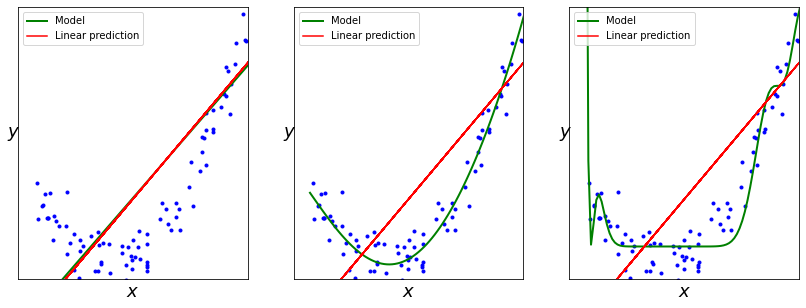

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 5, 25]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # PolynomialFeatures 클래스를 이용해 피처를 다항식 피처로 변환
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_poly = poly_features.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    lin_reg.intercept_ , lin_reg.coef_

    X_new=np.linspace(-5, 11, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "g", linewidth=2, label="Model")
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.plot(X_test, pred, 'r', label="Linear prediction")
    plt.legend()
    plt.axis([-6, 8, 0, 150])
plt.show()

위 예시는 실제 차수를 높게 가져가는 다항 회귀 모델이 어떤 오버피팅 문제를 가지는지 시각화 한 결과입니다.

1, 2, 3번 그래프는 각각 차수를 1, 5, 25로 가져간 다항 회귀 모델입니다.

현재 각 point에 해당하는 sample들은 2차 방정식 함수를 이용해서 생성했기 때문에 차수가 2인 degree = 2 인 다항 회귀에서 가장 높은 성능을 보이는 것을 확인할 수 있습니다.

**여기서 주목할 부분은 바로 마지막 그래프인 차수를 25로 가져간 모델인데 이 경우 차수가 너무 높아 학습된 데이터에 과도하게 fit하게 학습되어 앞서 언급한 오버피팅(overfitting) 문제가 발생합니다.**

**따라서 3번째 그래프의 모델은 학습된 데이터에는 매우 높은 성능을 보이지만 새로운 데이터에 대해선 낮은 성능을 보이게 됩니다.**

아래의 링크에서 보다 직관적으로 한눈에 어떻게 오버피팅 문제가 발생하는지 확인할 수 있는 자료를 참고했습니다.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

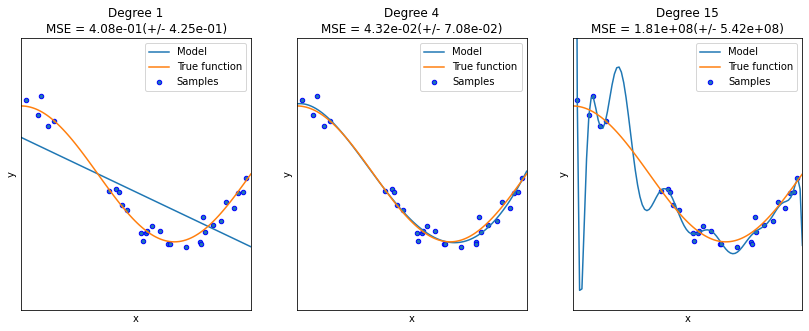

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# 편향-분산 트레이드오프(Bias-Variance Trade off)
---

위의 예시에서 Degree를 각각 1, 4, 15로 가져간 모델의 예측 결과를 살펴보았습니다.

그렇다면 `어떤 Degree를 가져가는 것이 가장 좋은 모델이 구현되는지에 대한 이슈가 발생합니다. `

위의 예시 중 첫번째 모델인 Degree가 1인 모델의 경우 **지나치게 단순화된 모델로 한 방향으로 치우진 경향을 보입니다. 이러한 문제를 고편향(High Bias)** 문제라고 합니다.

반대로 마지막 모델인 Degree가 15인 모델은 **지나치게 복잡한 모델로 높은 변동성을 보입니다. 이러한 문제를 고분산(High Variance)** 문제라고 합니다.

이 편향과 분산은 트레이드 오프 관계로 둘다 높게 가져가는 것은 어려운 일입니다. 

따라서 **편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 `골디락스` 지점**을 찾는것이 중요합니다.

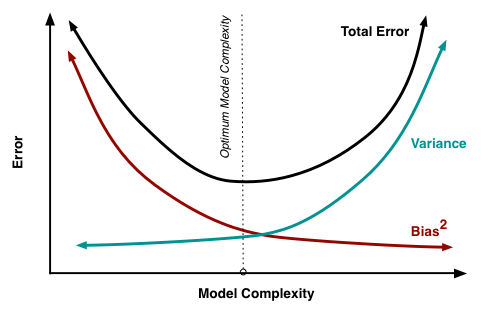

이미지 참고 : https://roytravel.tistory.com/59